In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data_link = '/content/subway_time (1).xlsx'
dataset = pd.read_excel(data_link)

In [8]:
dataset = dataset.iloc[1:,:]
print(dataset)

       호선명        지하철역  ... 03:00:00~03:59:59 Unnamed: 49
1      1호선         서울역  ...                 0           0
2      1호선         동묘앞  ...                 0           0
3      1호선          시청  ...                 0           0
4      1호선          종각  ...                 0           0
5      1호선        종로3가  ...                 0           0
..     ...         ...  ...               ...         ...
604  우이신설선      북한산보국문  ...                 0           0
605  우이신설선          정릉  ...                 0           0
606  우이신설선  성신여대입구(돈암)  ...                 0           0
607  우이신설선          보문  ...                 0           0
608  우이신설선         신설동  ...                 0           0

[608 rows x 50 columns]


In [112]:
print(dataset.iloc[:,8:14])
print(dataset.iloc[:,8])
print(dataset.iloc[:,29])

    07:00:00~07:59:59 Unnamed: 9  ... 09:00:00~09:59:59 Unnamed: 13
1               36079      87958  ...             41250      118758
2                5917       9312  ...              7473       17233
3                6323      61361  ...              7875       72526
4                5344      96690  ...             10244      123990
5                4731      25513  ...             10438       71795
..                ...        ...  ...               ...         ...
604             19654       5036  ...             14119        5739
605             13616       2977  ...             11238        3622
606              3408       3726  ...              4058        6146
607              2136       3049  ...              2588        2910
608              1345       5149  ...              1563        7132

[608 rows x 6 columns]
1      36079
2       5917
3       6323
4       5344
5       4731
       ...  
604    19654
605    13616
606     3408
607     2136
608     1345
Name: 07:00:00~07

In [129]:
def min_max_peoples(subway, dataset):
  subway_index = []
  for i in range(len(dataset)):
    if dataset.iloc[i,0] == subway:
      subway_index.append(i)
  # print(subway_index)
  subway_dataset = dataset.iloc[subway_index,:]
  # print(subway_dataset)

  # 출 퇴근 시간대 인구
  morning_peoples = subway_dataset.iloc[:,8:14]
  afternoon_peoples = subway_dataset.iloc[:,28:34]
  hot_time_peoples = pd.concat([subway_dataset.iloc[:,:2],morning_peoples, afternoon_peoples], axis = 1)
  # hot_time_peoples = pd.concat([subway_dataset.iloc[:,:2],morning_peoples, afternoon_peoples])
  # print(hot_time_peoples)

  # 출 퇴근 시간이 아닐 때의 인구
  not_hot_time_people_1 = subway_dataset.iloc[:, 0:8]
  not_hot_time_people_2 = subway_dataset.iloc[:, 14:28]
  not_hot_time_people_3 = subway_dataset.iloc[:, 34:]
  not_hot_time_peoples = pd.concat([not_hot_time_people_1,not_hot_time_people_2,not_hot_time_people_3], axis = 1)
  # not_hot_time_peoples = pd.concat([not_hot_time_people_1,not_hot_time_people_2,not_hot_time_people_3])

  # print(not_hot_time_peoples)

  # 출 퇴근 시간대 각 역의 인구
  subway_sums_hot = []
  for i in range(0,len(hot_time_peoples)):
    subway_sums_hot.append(0)
    for j in range(0, len(hot_time_peoples.columns)-2, 2):
      # j+2가 기본(맨 앞에 호선, 역 이름이 있기 때문)
      subway_sums_hot[i] += (hot_time_peoples.iloc[i,j+2] + hot_time_peoples.iloc[i,j+3])

  # print(subway_sums_hot)

  # 출 퇴근 시간대 아닐 때의 각 역의 인구
  subway_sums_not_hot = []
  for i in range(0, len(not_hot_time_peoples)):
    subway_sums_not_hot.append(0)
    for j in range(0, len(not_hot_time_peoples.columns)-2, 2):
      # j+2가 기본(맨 앞에 호선, 역 이름이 있기 때문)
      subway_sums_not_hot[i] += (not_hot_time_peoples.iloc[i,j+2] + not_hot_time_peoples.iloc[i,j+3])
    
  # print(subway_sums_not_hot)

  # 역 별 인구 비율 구하기
  subway_percents_for_max = []
  subway_percents_for_min = []
  for i in range(len(subway_sums_hot)):
    subway_percents_for_max.append(abs((abs(subway_sums_not_hot[i] - subway_sums_hot[i]))/(subway_sums_not_hot[i] + subway_sums_hot[i])))
    # print('subway_sums_not_hot : {}, subway_sums_hot : {}'.format(subway_sums_not_hot[i], subway_sums_hot[i]))
    subway_percents_for_min.append(abs((abs(subway_sums_not_hot[i] - subway_sums_hot[i]))/(subway_sums_not_hot[i] + subway_sums_hot[i])))

  # print(subway_percents_for_min)
  # 가장 큰 3개 역
  subway_percents_last_max = []
  for i in range(3):
    index = subway_percents_for_max.index(max(subway_percents_for_max))
    subway_percents_last_max.append(index)
    subway_percents_for_max[index] = -9999999999
  # 가장 작은 3개 역
  subway_percents_last_min = []
  for i in range(3):
    index = subway_percents_for_min.index(min(subway_percents_for_min))

    subway_percents_last_min.append(index)
    subway_percents_for_min[index] = 9999999999
  return subway_percents_last_max, subway_percents_last_min
min_max_peoples('1호선', dataset)

([1, 8, 6], [7, 0, 3])

In [184]:
def calc_percent(m_dataset):
  percents = [[],[],[]]
  for i in range(len(m_dataset)):
    for j in range(0,len(m_dataset.columns)-2, 2):
      # print('{}, {}'.format(m_dataset.iloc[i, j+2], m_dataset.iloc[i, j+3])) 
      if m_dataset.iloc[i, j+2] == 0 or m_dataset.iloc[i, j+3] == 0:
        p = 0
      else:
        if m_dataset.iloc[i, j+2] < m_dataset.iloc[i, j+3]:
          p = m_dataset.iloc[i, j+2] / m_dataset.iloc[i, j+3] 
        else:
          p = m_dataset.iloc[i, j+3] / m_dataset.iloc[i, j+2] 
      percents[i].append(p)

  return percents

   호선명 지하철역 04:00:00~04:59:59  ... Unnamed: 47 03:00:00~03:59:59 Unnamed: 49
2  1호선  동묘앞                57  ...           0                 0           0
9  1호선  제기동               340  ...           0                 0           0
7  1호선  동대문               635  ...           0                 0           0

[3 rows x 50 columns]
[[0.05263157894736842, 0.2983816587997303, 0.7198057432432432, 0.6354166666666666, 0.3470724191063174, 0.4336447513491557, 0.4758522727272727, 0.5185900721523479, 0.6798573486043481, 0.7925179856115108, 0.9522688284166975, 0.7893118640844401, 0.515227507035582, 0.4549494279555629, 0.41645538562198414, 0.6271934030108351, 0.7807630306286942, 0.789074074074074, 0.6627053477804963, 0.44197952218430037, 0.0025041736227045075, 0, 0, 0], [0.011764705882352941, 0.428912006935414, 0.9742201294879341, 0.8601365890167462, 0.7377363528240977, 0.599631973680542, 0.6406396012875091, 0.7901017817741821, 0.9530754754358162, 0.9823096655534582, 0.9642921960072596, 0.8774599723

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50526 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

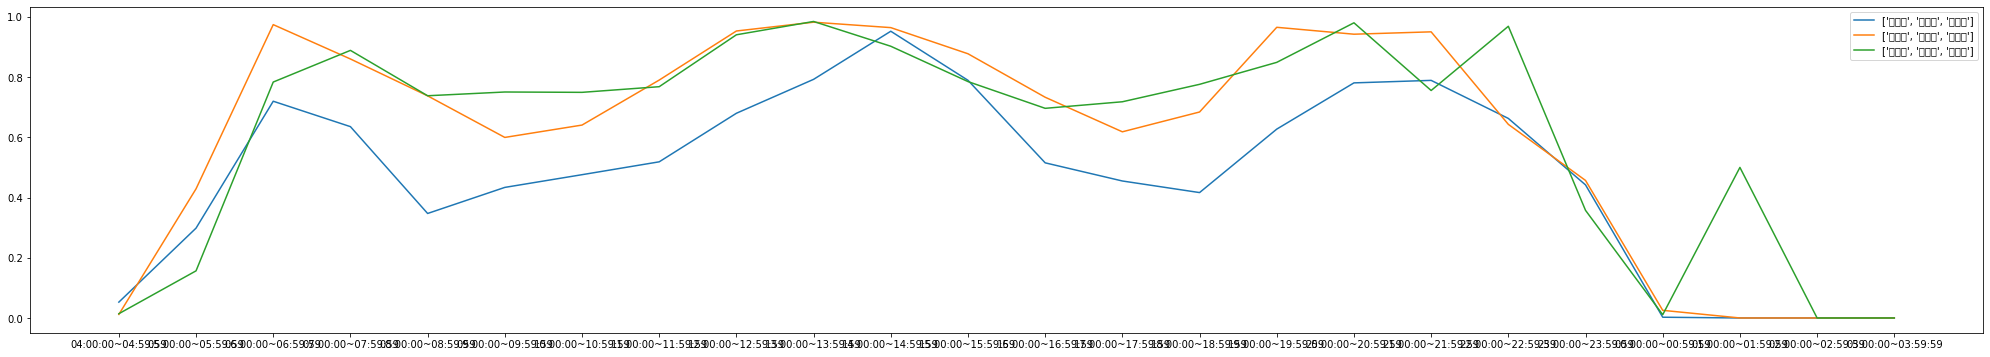

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_

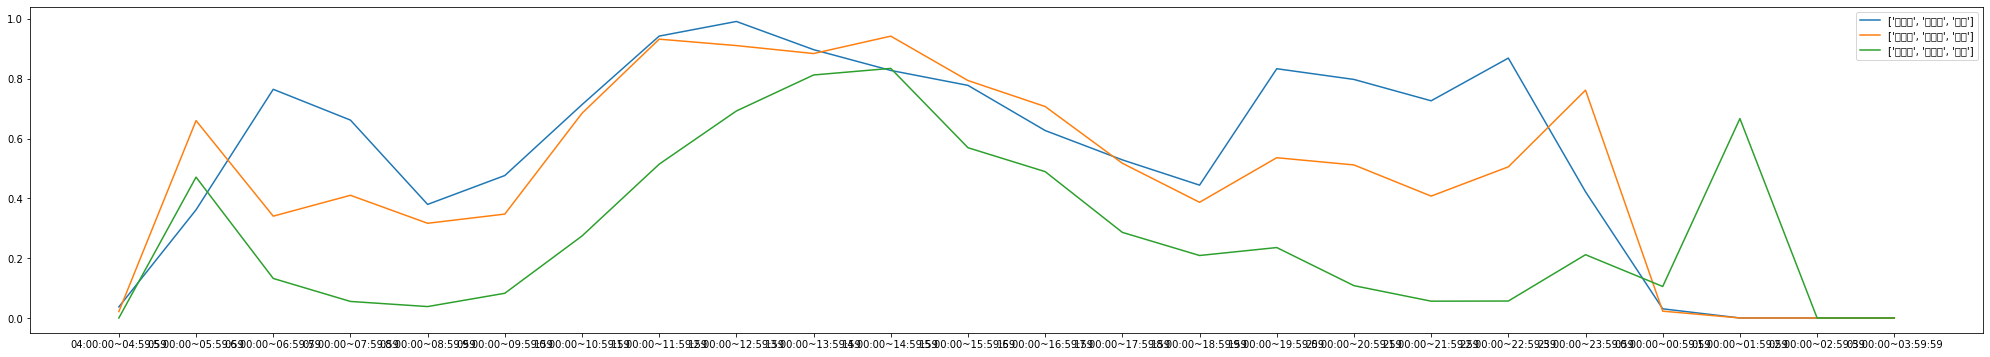

In [185]:
min_dataset_index, max_dataset_index = min_max_peoples('1호선', dataset)

min_dataset = dataset.iloc[min_dataset_index, :]
max_dataset = dataset.iloc[max_dataset_index, :]

print(min_dataset)
x = [dataset.columns[i] for i in range(2,len(dataset.columns), 2)]
# x = dataset.columns[2:]

min_percents = calc_percent(min_dataset)
max_percents = calc_percent(max_dataset)
print(min_percents)

# plt.plot(x, min_percents[0], x, min_percents[1], x, min_percents[2],autopct='%.1f%%')
plt.figure(1)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (35,6)
legend = list(min_dataset.iloc[:,1])
print(legend)
plt.plot(x, min_percents[0], x, min_percents[1], x, min_percents[2], label = legend)
plt.legend()

plt.figure(2)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (35,6)
legend = list(max_dataset.iloc[:,1])
print(legend)
plt.plot(x, max_percents[0], x, max_percents[1], x, max_percents[2], label = legend)
plt.legend()

plt.show()